# CAP 5768 - Data Science - Dr. Marques - Fall 2019

## Assignment 2: Exploratory data analysis

### Goals 

- To increase familiarity with the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To explore (manipulate, summarize, and visualize) datasets. 
- To improve the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.

### Instructions

- This assignment is structured in three parts, using a different dataset for each part.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 154 (plus up to 85 bonus points), distributed as follows: Part 1 (58+ pts), Part 2 (28+ pts), Part 3 (43+ pts), and Conclusions (25 pts).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an exercise in performing exploratory data analysis; expanding (and practicing) your knowledge of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test hypotheses and  answer questions based on the available data (and associated summary statistics).
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc. 
- You must **organize your data files in the proper folders** for the code to work.

-------------------
## Part 1: The MovieLens 1M dataset

This is a dataset of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata, and demographic data about the users. Such data is often of interest in the development of recommendation systems based on machine learning algorithms. 

The MovieLens 1M dataset contains ~1 million ratings collected from ~6,000 users on ~4,000 movies. It's spread across three tables: _ratings_, _user information_, and _movie information_. After extracting the data from the ZIP file (available on Canvas), we can load each table into a pandas DataFrame object using the Python code below.

See:
https://grouplens.org/datasets/movielens/ for additional information.

In [24]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

Before running the cell below, make sure that you have downloaded the movielens.zip file from Canvas, unzipped it, and placed its contents under the 'data' folder. 

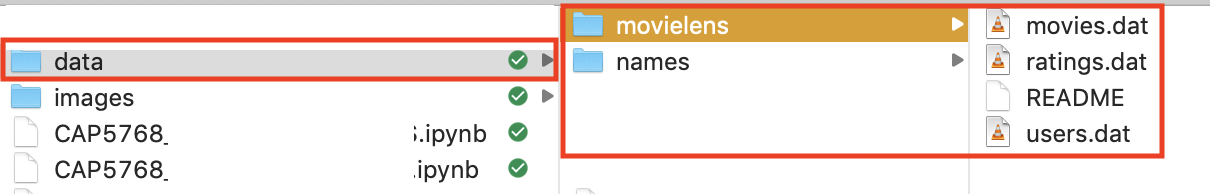

In [25]:
import pandas as pd

# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/movielens/users.dat', sep='::',
                      header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/movielens/ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/movielens/movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: read_table is deprecated, use read_csv instead.
  if sys.path[0] == '':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: read_table is deprecated, use read_csv instead.
  app.launch_new_instance()


# Your turn! (24 points, i.e., 6 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):
1. How many users are stored in the _users_ table and what information is stored for each user?
2. How many movies are stored in the _movies_ table and what information is stored for each movie?
3. How many ratings are stored in the _ratings_ table and what information is stored for each rating?
4. How are users, the movies each user has rated, and the rating related?

*Note*: ages and occupations are coded as integers indicating _groups_ described in the dataset’s README file.

In [26]:
!cat 'data/movielens/README'

SUMMARY

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

USAGE LICENSE

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:

     * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set
       (see below for citation information).

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining permission
       from a facult

## Solution

(ENTER YOUR ANSWERS HERE)

In [27]:
# ENTER YOUR CODE HERE
##..
users.nunique()

user_id       6040
gender           2
age              7
occupation      21
zip           3439
dtype: int64

1.There are 6040 users in total. The information stored about each user is:user_id, gender, age, occupation and the zip code.


In [28]:
# ENTER YOUR CODE HERE
##..
movies.nunique()
    

movie_id    3883
title       3883
genres       301
dtype: int64

In [29]:
# ENTER YOUR CODE HERE
##..
ratings.nunique()


user_id        6040
movie_id       3706
rating            5
timestamp    458455
dtype: int64

3.There are 5 different types of ratings. The information stored about each rating is: user_id, movie_id, rating and timestamp.


In [30]:
users.head(1)


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067


In [31]:
movies.head(1)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy


In [32]:
ratings.head(1)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760


4.The users, the movies each user has rated and the rating are realted by the user_id and the movie_id.


# Your turn! (24 points, i.e., 6 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):
5. What is the occupation that maps to most of the users? Plot a histogram of the occupation counts and report the size of the largest bin.
6. What percentage of users are 50 years old or older? Plot a pie chart showing all percentages (per age group) and report the requested value.
7. Which movie received the highest number of ratings (and how were such ratings distributed)?
8. What is the average rating for all movies/users?

## Solution

(ENTER YOUR ANSWERS HERE)

In [33]:
users['occupation_type'] = users.occupation.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
['other','educator','artist','clerical','college student','customer service','health care','executive',
'farmer','homemake','K-12 student','lawyer','programmer','retired','sales','scientist','self-employed','engineer',
'tradesman','unemployed', 'writer'])
users.head()

,user_id,gender,age,occupation,zip,occupation_type
0,1,F,1,10,48067,K-12 student
1,2,M,56,16,70072,self-employed
2,3,M,25,15,55117,scientist
3,4,M,45,7,02460,executive
4,5,M,25,20,55455,writer


In [34]:
# ENTER YOUR CODE HERE
occupation_counts = users.occupation_type.value_counts()
occupation_counts



college student     759
other               711
executive           679
educator            528
engineer            502
                   ... 
customer service    112
homemake             92
unemployed           72
tradesman            70
farmer               17
Name: occupation_type, Length: 21, dtype: int64

Text(0, 0.5, 'Number of users')

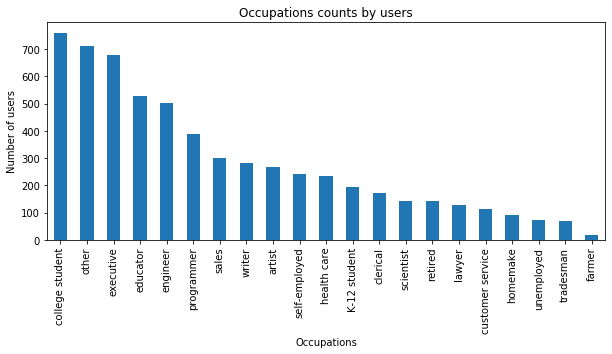

In [35]:
# plot a graph of no-shown as a function of age
occupation_counts.plot(kind='bar', figsize=(10,4), color="#2077B4")
plt.title('Occupations counts by users')
plt.xlabel('Occupations')
plt.ylabel('Number of users')

The largest bins is represented by the college/Graduate students with 759 users.


In [36]:
fifty= users[users['age']>=50]['age'].count()
fifty

876

In [37]:
#..Define total

total = users.count()['age']
total

6040

In [38]:
print('Percentage of 50 years old or older users:')
percentage = (fifty/total)*100
percentage

Percentage of 50 years old or older users:


14.503311258278146

In [39]:
#..Define total

age_counts = users.age.value_counts()
age_counts

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

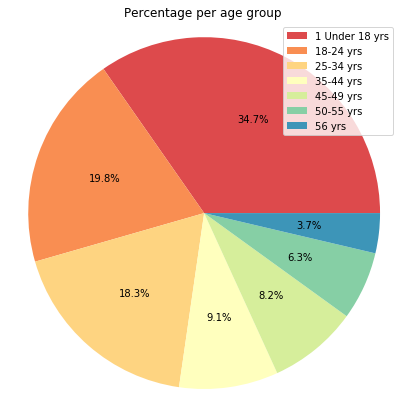

In [40]:
labels = ['1 Under 18 yrs', '18-24 yrs','25-34 yrs','35-44 yrs','45-49 yrs','50-55 yrs','56 yrs']
plt.pie(age_counts, colors=sns.color_palette("Spectral", 7) ,shadow=False, autopct='%1.1f%%')
plt.title('Percentage per age group')
plt.axis('equal');
plt.legend(labels)
fig = plt.gcf()
fig.set_size_inches(7,7);

In [41]:
ratings.head()


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [42]:
print('The movie whit highest number of ratings is the 2858 (movie_id)')
counts = ratings.movie_id.value_counts()
counts

The movie whit highest number of ratings is the 2858 (movie_id)


2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3323       1
624        1
763        1
2484       1
133        1
Name: movie_id, Length: 3706, dtype: int64

In [45]:
data.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Gate of Heavenly Peace, The (1995)    5.0
Lured (1947)                          5.0
Ulysses (Ulisse) (1954)               5.0
Smashing Time (1967)                  5.0
Follow the Bitch (1998)               5.0
                                     ... 
Kestrel's Eye (Falkens �ga) (1998)    1.0
Windows (1980)                        1.0
Venice/Venice (1992)                  1.0
Get Over It (1996)                    1.0
Elstree Calling (1930)                1.0
Name: rating, Length: 3706, dtype: float64

The ratings were distributed in a 5-star scale (whole-star ratings only).

-------------------
We will use the Python code below to merge all three tables into a unified data frame.

In [46]:
data = pd.merge(pd.merge(ratings,users),movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,occupation_type,title,genres
0,1,1193,5,978300760,F,1,10,48067,K-12 student,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,self-employed,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,programmer,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,executive,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,educator,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,engineer,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,sales,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,engineer,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,writer,One Little Indian (1973),Comedy|Drama|Western


The Python code below will show the top 10 films among female viewers (and, for comparison's sake, the ratings for those movies by male viewers) in decreasing order (highest rated movie on top).

In [47]:
# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


# Your turn! (10 points, i.e., 5 pts each)

Modify the Python code to:
9. Display the top 10 favorite movies among male viewers, selecting only movies with 250 ratings or more.
10. Display the top 10 favorite movies among young viewers (17 years old or younger), selecting only movies with 300 ratings or more.

## Solution

In [48]:
# Display the top 10 favorite movies among male viewers, selecting only movies with 250 ratings or more.
# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_female_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_female_ratings[:10]




gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [49]:
#  Display the top 10 favorite movies among young viewers (17 years old or younger), selecting only movies with 300 ratings or more.
# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='age', aggfunc='mean')
# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 300 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 300]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_female_ratings = mean_ratings.sort_values(by=1, ascending=False)
top_female_ratings[:10]

age,1,18,25,35,45,50,56
title,,,,,,,
Metropolis (1926),4.888889,3.872340,4.079470,4.032967,4.119048,4.218750,4.187500
GoodFellas (1990),4.840000,4.457912,4.355714,4.154321,3.929134,4.084746,3.984848
"Third Man, The (1949)",4.818182,4.346939,4.402516,4.475248,4.431818,4.531250,4.500000
Double Indemnity (1944),4.777778,4.372881,4.471338,4.363057,4.460317,4.507937,4.186047
"Piano, The (1993)",4.750000,3.408451,3.696000,3.681818,3.666667,3.642857,3.920000
Fried Green Tomatoes (1991),4.750000,3.734513,3.687783,3.844828,3.879310,4.018868,4.178571
Raging Bull (1980),4.714286,4.439560,4.190114,4.148387,3.903226,4.033898,4.242424
Roman Holiday (1953),4.687500,4.290909,4.248175,4.136842,4.000000,4.146341,4.400000
Citizen Kane (1941),4.680000,4.392405,4.365854,4.400000,4.339130,4.468750,4.333333


# BONUS! (up to 20 points)

Write Python code to display the most divisive movies (selecting only movies with 250 ratings or more), i.e.:
- The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.
- The top 10 movies with the greatest rating difference in the opposite direction (sign) so that we can see which ones were preferred by men.

Hint/Convention: ``mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']``

## Solution

In [50]:
# ENTER YOUR CODE HERE
#The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.

mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
mean_ratings[:10]



gender,F,M,diff
title,,,
"$1,000,000 Duck (1971)",3.375000,2.761905,-0.613095
'Night Mother (1986),3.388889,3.352941,-0.035948
'Til There Was You (1997),2.675676,2.733333,0.057658
"'burbs, The (1989)",2.793478,2.962085,0.168607
...And Justice for All (1979),3.828571,3.689024,-0.139547
1-900 (1994),2.000000,3.000000,1.000000
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785


In [51]:
# ENTER YOUR CODE HERE
#The top 10 movies with the greatest rating difference in the opposite direction (sign) so that we can see which ones were preferred by men.

mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

mean_ratings['diff'] = mean_ratings['F'] - mean_ratings['M']
mean_ratings[:10]


gender,F,M,diff
title,,,
"$1,000,000 Duck (1971)",3.375000,2.761905,0.613095
'Night Mother (1986),3.388889,3.352941,0.035948
'Til There Was You (1997),2.675676,2.733333,-0.057658
"'burbs, The (1989)",2.793478,2.962085,-0.168607
...And Justice for All (1979),3.828571,3.689024,0.139547
1-900 (1994),2.000000,3.000000,-1.000000
10 Things I Hate About You (1999),3.646552,3.311966,0.334586
101 Dalmatians (1961),3.791444,3.500000,0.291444
101 Dalmatians (1996),3.240000,2.911215,0.328785


# BONUS! (up to 10 points)

Write Python code to display the top 10 movies (with 250 ratings or more) that elicited the most disagreement among viewers, independent of gender identification. 

Hint: Disagreement can be measured by the _variance_ or _standard deviation_ of the ratings.

## Solution

In [52]:
# ENTER YOUR CODE HERE

mean_ratings = data.pivot_table('rating', index='title',
                                 aggfunc='mean')
rating_std_by_title = data.groupby('title')['rating'].std()
# Movies with 250 ratings or more
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title >=250

rating_std_by_title.sort_values(ascending=False)[:10]


title
Dumb & Dumber (1994)                           1.321333
Blair Witch Project, The (1999)                1.316368
Natural Born Killers (1994)                    1.307198
Tank Girl (1995)                               1.277695
Rocky Horror Picture Show, The (1975)          1.260177
Eyes Wide Shut (1999)                          1.259624
Billy Madison (1995)                           1.249970
Bicentennial Man (1999)                        1.245533
Babe: Pig in the City (1998)                   1.239379
South Park: Bigger, Longer and Uncut (1999)    1.235380
Name: rating, dtype: float64

# BONUS! (up to 10 points)

Write Python code to answer the question: 
What is the most popular movie genre? 
Plot a histogram of the genre counts and report the size of the largest bin.

Hint: use the original **movies** data frame, _before_ the merge!

## Solution

In [53]:
##..What is the most popular movie genre
rating_popular_genres = data.pivot_table('rating', index='title',
                                columns='genres', aggfunc='mean')
rating_popular_genres = data.groupby('genres')['rating'].mean()
rating_popular_genres.sort_values(ascending=False)[:10]

genres
Animation|Comedy|Thriller            4.473837
Sci-Fi|War                           4.449890
Animation                            4.394336
Film-Noir|Mystery                    4.367424
Adventure|War                        4.346107
Film-Noir|Romance|Thriller           4.294382
Action|Adventure|Drama|Sci-Fi|War    4.292977
Film-Noir|Sci-Fi                     4.273333
Crime|Film-Noir                      4.264129
Film-Noir                            4.258105
Name: rating, dtype: float64

Text(0, 0.5, 'Avg. Rating')

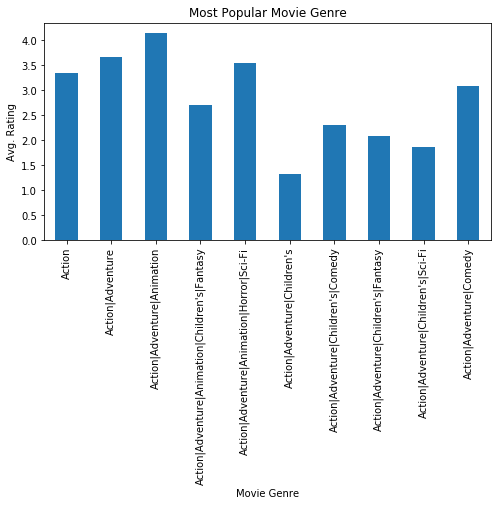

In [54]:
values =rating_popular_genres[:10]
labels = rating_popular_genres.index[:10]
values.plot(kind="bar", x=labels, figsize=(8,4), color="#2077B4")
plt.title("Most Popular Movie Genre")
plt.xlabel("Movie Genre")
plt.ylabel("Avg. Rating")

------------
## Part 2: Titanic

In this part we'll use the dataset of passengers on the *Titanic*, available through the Seaborn library.

See https://www.kaggle.com/c/titanic/data for codebook and additional information.

In [55]:
titanic = sns.load_dataset('titanic')

In [56]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Questions 11-14 (16 points total, i.e. 4 pts each)

Look at the Python code below and answer the following questions (expressing the amounts in absolute terms):

11. How many female passengers did not survive (regardless of their class)?
12. How many first class female passengers did not survive?
13. How many male passengers did not survive (regardless of their class)?
14. How many third class male passengers did not survive?

In [57]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


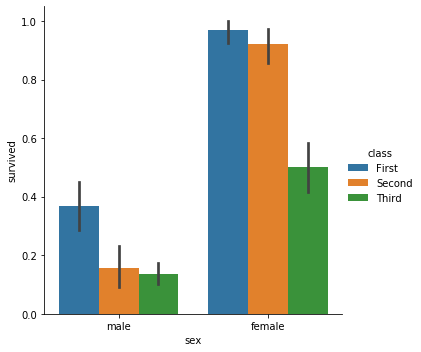

In [58]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

## Solution

Did not survive the 26% of female passengers.

Did not survive the 4% of first class female passengers.

Did not survive the 82% of male passengers.

Did not survive the 62% of third class male passengers.

## Your turn! (12 points, i.e., 4 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):

15. How many passengers (absolute number) were there per deck/class? 

(**Hint**: The plot below shows how decks and classes were related and provides a visual estimate.)
16. How many passengers (absolute number) in Deck A survived?
17. How many passengers (absolute number) in Deck E survived and what was the breakdown (in Deck E) per class?

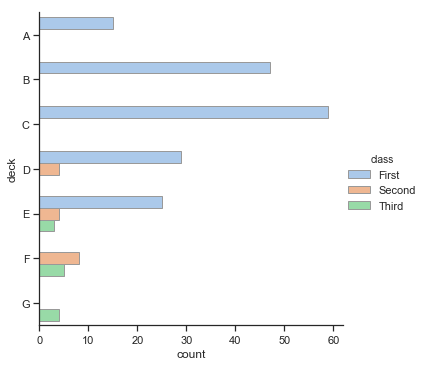

## Solution

In [59]:
#.15.How many passengers (absolute number) were there per deck/class?
passengers_deck_class  = titanic.groupby('deck').pclass.value_counts()
passengers_deck_class 

deck  pclass
A     1         15
B     1         47
C     1         59
D     1         29
      2          4
                ..
E     2          4
      3          3
F     2          8
      3          5
G     3          4
Name: pclass, Length: 11, dtype: int64

In [60]:
#.16. How many passengers (absolute number) in Deck A survived?
decks_survivors = titanic.groupby('deck').survived.value_counts()
decks_survivors

deck  survived
A     0            8
      1            7
B     1           35
      0           12
C     1           35
                  ..
E     0            8
F     1            8
      0            5
G     0            2
      1            2
Name: survived, Length: 14, dtype: int64

In [61]:
deck_A_suvivors = decks_survivors ['A']
deck_A_suvivors

survived
0    8
1    7
Name: survived, dtype: int64

In Deck A survived 7 passengers.

In [62]:
#.17.How many passengers (absolute number) in Deck E survived and what was the breakdown (in Deck E) per class?
deck_E_suvivors = decks_survivors ['E']
deck_E_suvivors

survived
1    24
0     8
Name: survived, dtype: int64

In Deck E survived 24 passengers.

In [63]:
decks_breakdown = titanic.groupby('deck').pclass.value_counts()
decks_breakdown

deck  pclass
A     1         15
B     1         47
C     1         59
D     1         29
      2          4
                ..
E     2          4
      3          3
F     2          8
      3          5
G     3          4
Name: pclass, Length: 11, dtype: int64

In [64]:
decks_E_class = decks_breakdown ['E']
decks_E_class

pclass
1    25
2     4
3     3
Name: pclass, dtype: int64

Deck E Breakdown:
    
1st Class: 25 passengers
    
2st Class: 4 passengers
    
3er Class: 3 passengers

# BONUS! (up to 20 points)

Write Python code to answer the following questions (using percentage values):
- How many women traveling alone did not survive?
- How many men 35 years old or younger did not survive?
- What was the average fare per class?

## Solution

In [65]:
# How many women traveling alone did not survive?
passengers_alone = titanic.groupby('sex').alone.value_counts()
women_alone = passengers_alone['female']
women_alone

alone
False    188
True     126
Name: alone, dtype: int64

In [66]:
#.How many men 35 years old or younger did not survive?
age = pd.cut(titanic['age'], [0, 34, 80])
titanic.pivot_table('survived', ['sex', age], aggfunc='count')

survived
sex    age               
female (0, 34]        180
       (34, 80]        81
male   (0, 34]        298
       (34, 80]       155

Answer: 155 men survived

In [67]:
#.What was the average fare per class?

avg_fare = titanic.groupby('class').fare.mean()
avg_fare

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

------------
## Part 3: US Baby Names 1880–2018

The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present. These plain text data files, one per year, contain the total number of births for each sex/name combination. The raw archive of these files can be obtained from http://www.ssa.gov/oact/babynames/limits.html.

After downloading the 'National data' file _names.zip_ and unzipping it, you will have a directory containing a series of files like _yob1880.txt_ through _yob2018.txt_. We need to do some data wrangling to load this dataset (see code below).

For your convenience, I have made the _names.zip_ file available on Canvas. 
Before running the cell below, make sure that you have downloaded it, unzipped it, and placed its contents under the 'data' folder. 

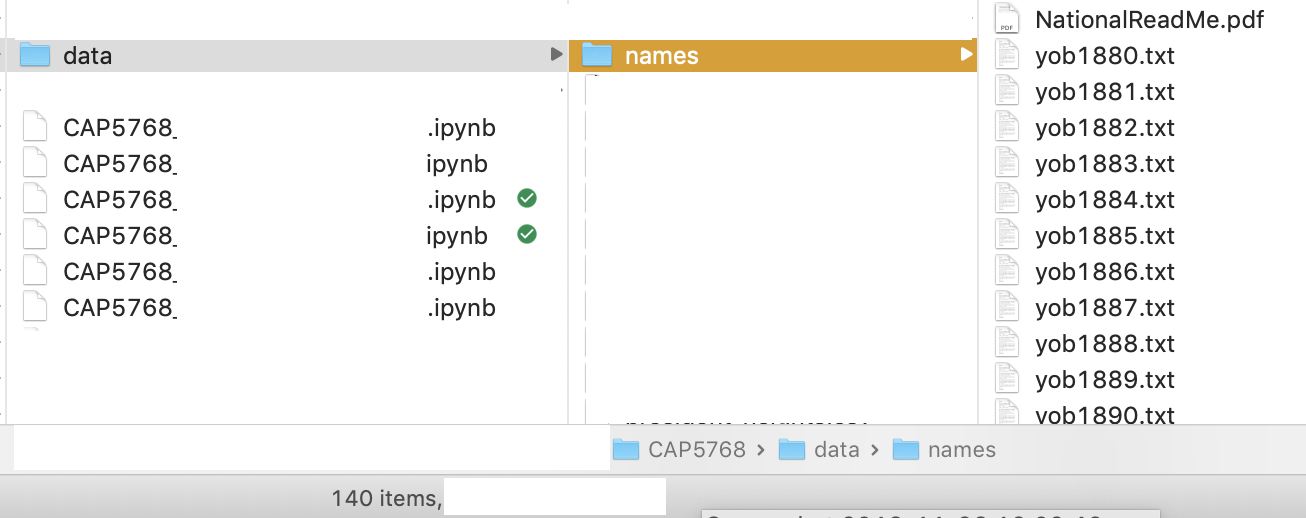

In [142]:
years = range(1880, 2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'data/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [143]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


## Your turn! (25 points)

Write Python code to compute the number of baby boys and baby girls born each year and display the two line plots over time. 

Hint: Start by aggregating the data at the year and sex level using ``groupby`` or ``pivot_table``.

Your plot should look like this:

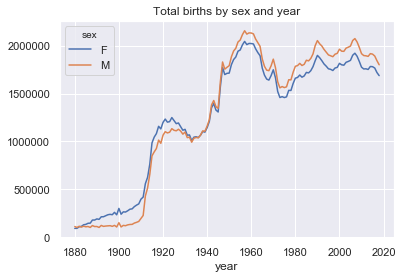

## Solution

In [70]:
# Baby boys and baby girls born each year

Births_by_year_sex = names.pivot_table('births', index='year',
                columns='sex', aggfunc=sum)
Births_by_year_sex.tail()

sex,F,M
year,,
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585
2017,1719138,1842837
2018,1686961,1800392


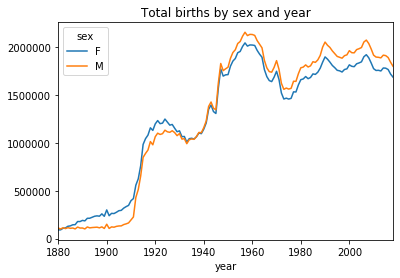

In [71]:
Births_by_year_sex.plot(title='Total births by sex and year')

-------------
## Analyzing Naming Trends

Suppose we're interested in analyzing the Top 1000 most popular baby names per year.

We will do so by following these steps:
1. Insert a column _prop_ with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name in a given year. 
2. Group the data by year and sex, then add the new column to each group.
3. Extract a subset of the data (the top 1,000 names for each sex/year combination). This is yet another group operation.
4. Split the Top 1,000 names into the boy and girl portions.
5. Build a pivot table of the total number of births by year and name.

Finally, we will plot the percentage of babies named 'John', 'Noah', 'Madison', or 'Lorraine' over time.

In [144]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [75]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1957041,Zylas,M,5,2018,0.000003
1957042,Zyran,M,5,2018,0.000003
1957043,Zyrie,M,5,2018,0.000003
1957044,Zyron,M,5,2018,0.000003


In [145]:
# Sanity check (all percentages should add up to 1, i.e., 100%)
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2016  M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
Name: prop, Length: 278, dtype: float64

In [146]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [147]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
277872,Korbyn,M,207,2018,0.000115
277873,Randall,M,207,2018,0.000115
277874,Benton,M,206,2018,0.000114
277875,Coleman,M,206,2018,0.000114


In [148]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [149]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [150]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7174 entries, Aaden to Zyaire
dtypes: float64(7174)
memory usage: 7.6 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a250aea58>,
      dtype=object)

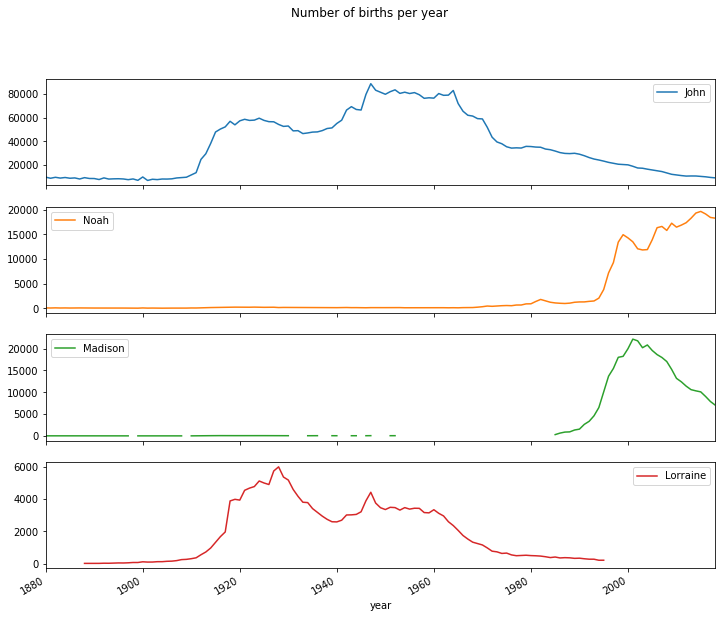

In [151]:
subset = total_births[['John', 'Noah', 'Madison', 'Lorraine']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

--------------
# BONUS! (up to 25 points)

Write Python code to test the hypothesis:

H1: There has been an increase in naming diversity over time. 

Hint: Compute a metric that consists of the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births, and plot that metric over time.

Your plot should look like this:

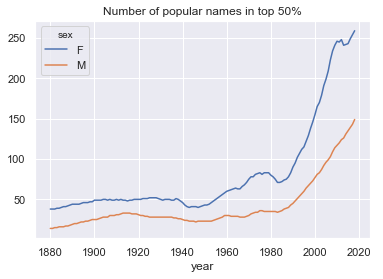

## Solution

In [152]:
#number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
    
diversity.head()
    
    
  

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


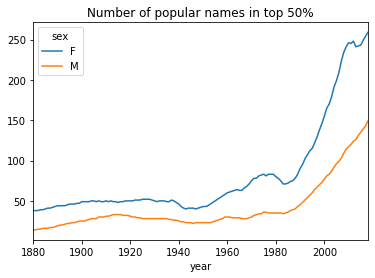

In [153]:
diversity.plot(title="Number of popular names in top 50%")

-------------
## Boy names that became girl names (and vice versa)

Next, let's look at baby names that were more popular with one sex earlier in the sample but have switched to the opposite sex over the years. One example is the name Lesley or Leslie (or other possible, less common, spelling variations). 

We will do so by following these steps:
1. Go back to the top1000 DataFrame and compute a list of names occurring in the dataset starting with “lesl”.
2. Filter down to just those names and sum births grouped by name to see the relative frequencies.
3. Aggregate by sex and year and normalize within year.
4. Plot the breakdown by sex over time.

In [154]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6108     Lesly
dtype: object

In [155]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    378168
Lesly      11433
Name: births, dtype: int64

In [156]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)

<Figure size 432x288 with 0 Axes>

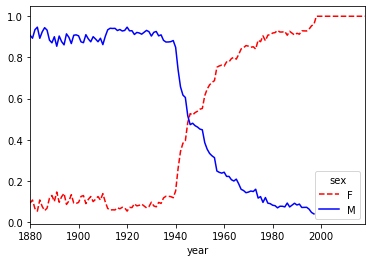

In [157]:
fig = plt.figure()
table.plot(style={'M': 'b-', 'F': 'r--'})

---------------------

Now it's time for you to come up with a different hypotheses, which we will call H2. **Be creative!**

Example: The name 'Reese' has been more prevalent among baby girls than baby boys since 2000.

## Your turn! (28 points)

Write Python code to test hypothesis H2 (and some text to explain whether it was confirmed or not).

## Solution

H2: Hispanic names increased in United States over time

In [158]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [159]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c41b780>,
      dtype=object)

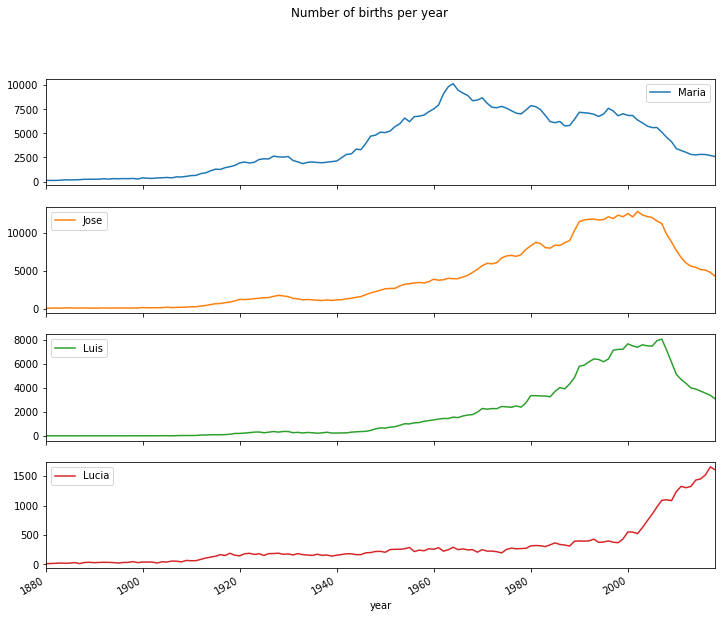

In [160]:
subset = total_births[['Maria', 'Jose', 'Luis', 'Lucia']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

The hypothesis H2 is CONFIRMED.Hispanic names increased in USA over time.

## Conclusions (25 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

1.I learned how to answer questions using Pivot Tables. In addition, I learned how to add columns to tables, how to merge tables and use concatenation among others Python features.


2.The part that I enjoy most was excersise using the Titanic database. The most time - consuming task was found out the most popular movie genre. The most tedious part was found out how many passengers (absolute number) in Deck E survived and what was the breakdown (in Deck E) per class.


3.If I will have an additional week I will spen more time in the H2 in Part 3: US Baby Names 1880–2018.